Gdrive mount + make dir

Imports libs

In [132]:
import libs.genetic_all as ga                  #STU FEI Genetic Toolbox in Python
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go

Paramaters GA (Population, end generation, number of parameters, interval of search space )

In [133]:
numgen    = 420	      # number of generations
lpop      = 69;	      # number of chromosomes in population
lstring   = 20;	      # number of genes in a chromosome
M         = 500;      # maximum of the search space
FitMin = 0
INT_MAX = 1000


B = np.array([
    [0, 0],
    [77, 68],
    [12, 75],
    [32, 17],
    [51, 64],
    [20, 19],
    [72, 87],
    [80, 37],
    [35, 82],
    [2, 15],
    [18, 90],
    [33, 50],
    [85, 52],
    [97, 27],
    [37, 67],
    [20, 82],
    [49, 0],
    [62, 14],
    [7, 60],
    [100, 100]
])




Space     = np.array([np.ones(lstring) * (-M), np.ones(lstring) * M]) # (from -500 to 500)
Delta     = Space[1, :] / 100.0


Pop=ga.genrpop(lpop,Space)

# generovanie populacie pre permutacne ulohy
# vygenerovanie hodnoty majo rozsah <1; max_val>
# genrpop_perm(rows, max_val):

evolution = np.zeros(numgen+1)

Debug: Pop[i][1] = 7, Pop[i][17] = 3
Debug: Pop[i][1] = 5, Pop[i][17] = 10
Debug: Pop[i][1] = 7, Pop[i][17] = 5
Debug: Pop[i][1] = 7, Pop[i][17] = 15
Debug: Pop[i][1] = 9, Pop[i][17] = 10
Debug: Pop[i][1] = 3, Pop[i][17] = 16
Debug: Pop[i][1] = 10, Pop[i][17] = 4
Debug: Pop[i][1] = 9, Pop[i][17] = 3
Debug: Pop[i][1] = 4, Pop[i][17] = 12
Debug: Pop[i][1] = 6, Pop[i][17] = 1
Debug: Pop[i][1] = 2, Pop[i][17] = 13
Debug: Pop[i][1] = 16, Pop[i][17] = 6
Debug: Pop[i][1] = 18, Pop[i][17] = 10
Debug: Pop[i][1] = 18, Pop[i][17] = 1
Debug: Pop[i][1] = 3, Pop[i][17] = 1
Debug: Pop[i][1] = 4, Pop[i][17] = 10
Debug: Pop[i][1] = 16, Pop[i][17] = 13
Debug: Pop[i][1] = 11, Pop[i][17] = 7
Debug: Pop[i][1] = 6, Pop[i][17] = 8
Debug: Pop[i][1] = 1, Pop[i][17] = 16
Debug: Pop[i][1] = 8, Pop[i][17] = 2
Debug: Pop[i][1] = 8, Pop[i][17] = 16
Debug: Pop[i][1] = 17, Pop[i][17] = 8
Debug: Pop[i][1] = 16, Pop[i][17] = 6
Debug: Pop[i][1] = 4, Pop[i][17] = 13
Debug: Pop[i][1] = 5, Pop[i][17] = 9
Debug: Pop[i][1] =

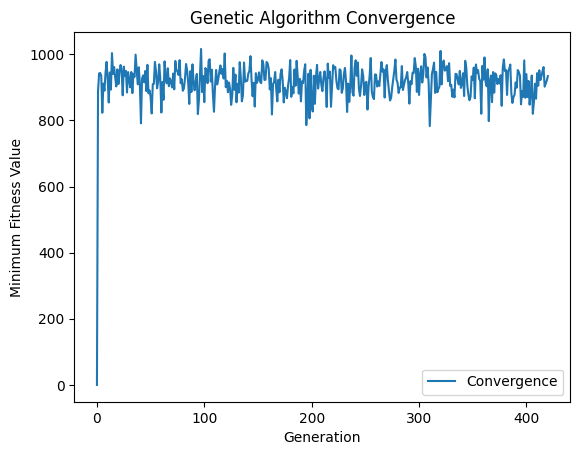

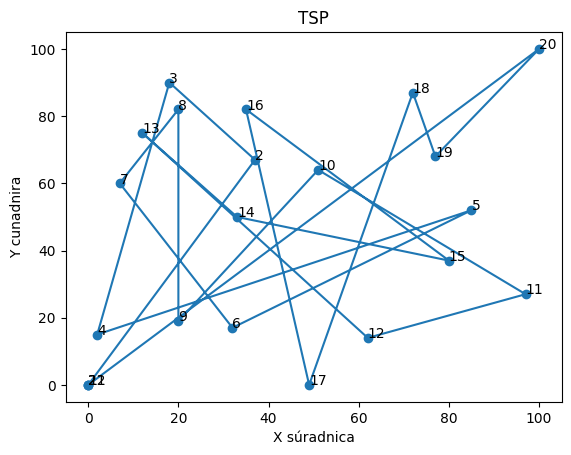

In [134]:
def basicGA(Pop,Fit):
  
  #Vyber 3 najlepsich z populacie
  SubPop1, _ = ga.selbest(Pop, Fit, [1, 1, 1], 0)
  #ostatny jedinci
  # new_Pop, _ = ga.selsus(Pop, Fit, 47)
  SubPop2, _ = ga.seltourn(Pop, Fit, 47)

  ga.swappart(SubPop1, 0.11)
  ga.swapgen(SubPop2, 0.17)
  # ga.crossov(Pop, 1, 0)
  #mutacia 0.2
  # ga.mutx(Pop, 0.2, Space)
  #mutacia vstupnej populacie
  # ga.muta(Pop, 0.2, Delta, Space)
  
  Pop = np.vstack((SubPop1, SubPop2))

  return Pop



def fitness(Pop, B):
  f = [] * lpop
  Fit = np.zeros((lpop), float)
  
  for i in range(lpop):
    for j in range(lstring - 1):
        x = int(Pop[i, j])
        n = int(Pop[i, j + 1])

        if 0 <= x < len(B) and 0 <= n < len(B):
            dis = math.sqrt(((B[x][0] - B[n][0]) ** 2) + ((B[x][1] - B[n][1]) ** 2))
            Fit[i] += dis 
        else:
            print(f"Index out of bounds - x={x}, n={n}")
    print(f"Debug: Pop[i][1] = {Pop[i][1]}, Pop[i][17] = {Pop[i][17]}")
    if 0 <= int(Pop[i][1]) < len(B) and 0 <= int(Pop[i][17]) < len(B) and 0 <= 19 < len(B):
        Fit[i] += (math.dist(B[0], B[int(Pop[i][1])]) + math.dist(B[int(Pop[i][17])], B[19]))
    else:
        print(f"Index out of bounds - Pop[i][1]={Pop[i][1]}, Pop[i][17]={Pop[i][17]}, 19={19}")
  return Fit


def genrpop_perm():

  Pop = np.zeros((lpop, lstring), int)
  for i in range(lpop):
        
    shuffled_array = np.random.permutation([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])[:lstring]
    Pop[i, :len(shuffled_array)] = shuffled_array

  return Pop


#main cyklus
for gen in range(1, numgen+1):

  #calc Fitness function/value
  # Fit   =   ga.schwefel(Pop)

  #eggholder funkcia pre testovanie
  # ga.eggholder(Pop)

  #rastrigin funkcia pre testovanie
  # ga.rastrigin(Pop)
  Pop = genrpop_perm()
  evo = np.zeros(numgen + 1)
  Fit = fitness(Pop, B)
  evolution[gen] = min(Fit)  
  Pop = basicGA(Pop, Fit)

  if FitMin > Fit[0]:
    FitMin = Fit[0]
    PopMin = Pop[0]


  #genetics operations
  # Pop = basicGA(Pop,Fit)
  # new_pop, new_fit = ga.selbest(Pop, Fit, [1, 1, 1])

plt.plot(range(numgen + 1), evolution, label='Convergence')
plt.xlabel('Generation')
plt.ylabel('Minimum Fitness Value')
plt.title('Genetic Algorithm Convergence')
plt.legend()
plt.show()




# x_coords = [point[0] for point in B]
# y_coords = [point[1] for point in B]
# plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Points')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Scatter Plot of Points')
# plt.legend()
# plt.show()


temparray = np.zeros((lstring + 2, 2))
for i in range(lstring):
    p_act = PopMin[i]
    temparray[i + 1] = B[p_act]
temparray[0] = B[0]
temparray[19] = B[19]


x_coords, y_coords = temparray[:, 0], temparray[:, 1]

plt.plot(x_coords, y_coords, marker="o", linestyle="-")
for i, (xi, yi) in enumerate(temparray):
    plt.text(xi, yi, f"{i + 1}")




plt.title("TSP")
plt.xlabel("X súradnica")
plt.ylabel("Y cunadnira")
# Uká2 graf
plt. show()